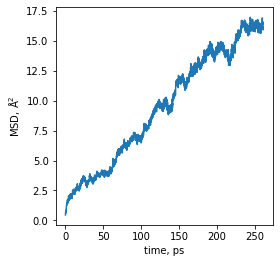

In [1]:
import numpy as np
import matplotlib.pyplot as plt

msd = np.loadtxt('li_300.txt', skiprows=2, unpack=True)

steps = np.arange(0, len(msd))

time = steps/10

plt.plot(time, msd)
plt.xlabel('time, ps')
plt.ylabel('MSD, $\mathrm{\AA^2}$')

def make_square_axes(ax):
    """Make an axes square in screen units.

    Should be called after plotting.
    """
    ax.set_aspect(1 / ax.get_data_ratio())

make_square_axes(plt.gca())

plt.savefig('msd_cub600.jpg', bbox_inches='tight', dpi=500)

In [2]:
##########
d = 3
charge = 1
conc = 1.59 * 10**(28)
haven = 1
##########

T=500

slope, intercept = np.polyfit(time, msd, 1)

dc = (slope * (10 ** (-8))) / (2*d)

cond = (((charge * 1.602 * 10**(-19))**2 * conc * dc * haven)/((1.381 * 10**(-23)) * T) * 10**(-2))

        # Conversion of diffusion coefficient to conductivity as follows:
        #
        # conducitivity = (charge**2 * charge carrier concentration * diffusion coefficient) / boltzmann constant * temperature
        #
        # charge is electron charge (sodium singularly charged), so 1.602 * 10**(-19) C
        #
        # charge carrier concentration calculated as number of Li/Sc/Cl ions in the simulation cell/cell dimensions
        #
        # diffusion coefficient calcualted as above fromm MSD plot slopes
        #
        # boltzmann constant = 1.381 * 10**(-23) J/K
        #
        # temperature varies with experiment
        #
        # !!! 10**(-2) added to get final results in S/cm as conventionally displayed

In [3]:
cond

0.06083852322561093